# <font color='blue'>Python para Ciência de Dados</font>
# <font color='blue'>Capítulo 11</font>


In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python usada neste Jupyter Notebook:', python_version())

Versão da Linguagem Python usada neste Jupyter Notebook: 3.10.12


# Módulos para Análise de Dados

## Statsmodels

In [4]:
# Instalando o pacote Statsmodels
# Statsmodels já vem disponível no pacote do Anaconda
# !pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: /usr/bin/python3 -m pip install --upgrade pip


In [6]:
# Verificando a versão
import statsmodels as st
st.__version__

'0.14.1'

In [21]:
import numpy as np
import statsmodels.api as sm

# Gerando dados de exemplo
np.random.seed(123)
X = np.random.rand(100, 2)
y = 1 + 2 * X[:,0] + 3 * X[:,1] + np.random.randn(100)

# Adicionando uma constante aos dados de entrada para o termo de interceptação
X = sm.add_constant(X)

# Criando o modelo de regressão linear
model = sm.OLS(y, X)

# Ajustando o modelo aos dados
results = model.fit()

# Imprimindo os resultados da regressão
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     62.62
Date:                Mon, 19 Feb 2024   Prob (F-statistic):           3.44e-18
Time:                        09:20:41   Log-Likelihood:                -133.26
No. Observations:                 100   AIC:                             272.5
Df Residuals:                      97   BIC:                             280.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4441      0.286      1.552      0.1

In [22]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  [0.44406579 2.72390604 3.26218356]
R2:  0.5635465070245532


In [23]:
nsample = 50
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x-5)**2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.]

y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     278.2
Date:                Mon, 19 Feb 2024   Prob (F-statistic):           1.75e-29
Time:                        09:20:43   Log-Likelihood:                -32.352
No. Observations:                  50   AIC:                             72.70
Df Residuals:                      46   BIC:                             80.35
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5437      0.025     21.468      0.0

In [24]:
print('Parameters: ', res.params)
print('Standard errors: ', res.bse)
print('Predicted values: ', res.predict())

Parameters:  [ 0.54370732  0.49608153 -0.02255715  4.65153761]
Standard errors:  [0.02532675 0.09956242 0.00222371 0.16421958]
Predicted values:  [ 4.08760883  4.59474897  5.06202197  5.46239182  5.77857968  6.0059027
  6.15304346  6.24062339  6.29781476  6.35754775  6.45110012  6.60295835
  6.82679458  7.12322035  7.47968607  7.87254294  8.27092833  8.64183646
  8.95554113  9.19047968  9.33679563  9.39795812  9.39019192  9.33981173
  9.27889877  9.24002992  9.25092543  9.32989457  9.48282745  9.7022273
  9.96844219 10.25289376 10.52277255 10.74642854 10.89857115 10.96442439
 10.94215452 10.84317134 10.6902536  10.51380646 10.3468661  10.21967189
 10.15469817 10.16296181 10.24221212 10.37730068 10.54267014 10.70655325
 10.83619211 10.90322023]


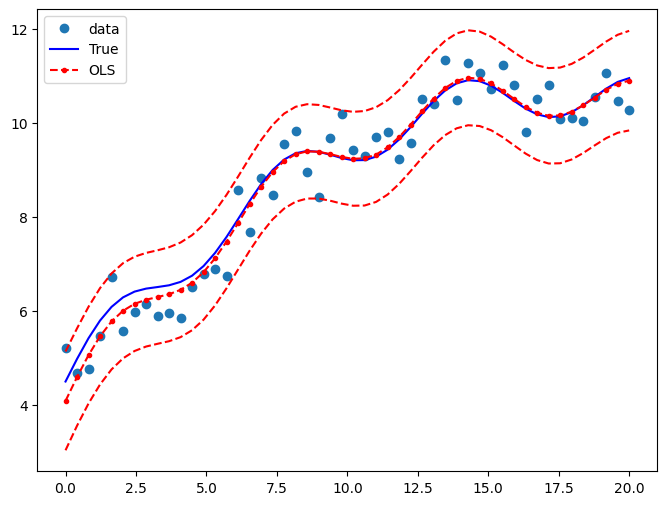

In [25]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# Para visualização de gráficos
from pylab import *
%matplotlib inline

prstd, iv_l, iv_u = wls_prediction_std(res)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label="data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res.fittedvalues, 'r--.', label="OLS")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.legend(loc='best')

## Análise de Série Temporal

In [71]:
# Datas em modelos de série temporal
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

In [72]:
data = sm.datasets.sunspots.load()

In [73]:
from datetime import datetime

dates = pd.date_range("1700-1-1", periods=len(data.endog), freq="A-DEC")

In [74]:
data.endog.index = dates
endog = data.endog
endog

1700-12-31     5.0
1701-12-31    11.0
1702-12-31    16.0
1703-12-31    23.0
1704-12-31    36.0
              ... 
2004-12-31    40.4
2005-12-31    29.8
2006-12-31    15.2
2007-12-31     7.5
2008-12-31     2.9
Freq: A-DEC, Name: SUNACTIVITY, Length: 309, dtype: float64

In [75]:
selection_res = ar_select_order(endog, 9, old_names=False, seasonal=True, period=11)
pandas_ar_res = selection_res.model.fit()

In [76]:
pred = pandas_ar_res.predict(start="2005", end="2027")
print(pred)

2005-12-31    25.907501
2006-12-31    29.024373
2007-12-31    18.855729
2008-12-31    21.392012
2009-12-31    25.695092
2010-12-31    49.981886
2011-12-31    76.437566
2012-12-31    86.244709
2013-12-31    89.184663
2014-12-31    72.251362
2015-12-31    48.447259
2016-12-31    32.292122
2017-12-31    22.374099
2018-12-31    18.581657
2019-12-31    22.935657
2020-12-31    34.513168
2021-12-31    47.828469
2022-12-31    65.487766
2023-12-31    76.551575
2024-12-31    84.185043
2025-12-31    72.029019
2026-12-31    52.603134
2027-12-31    39.330875
Freq: A-DEC, dtype: float64


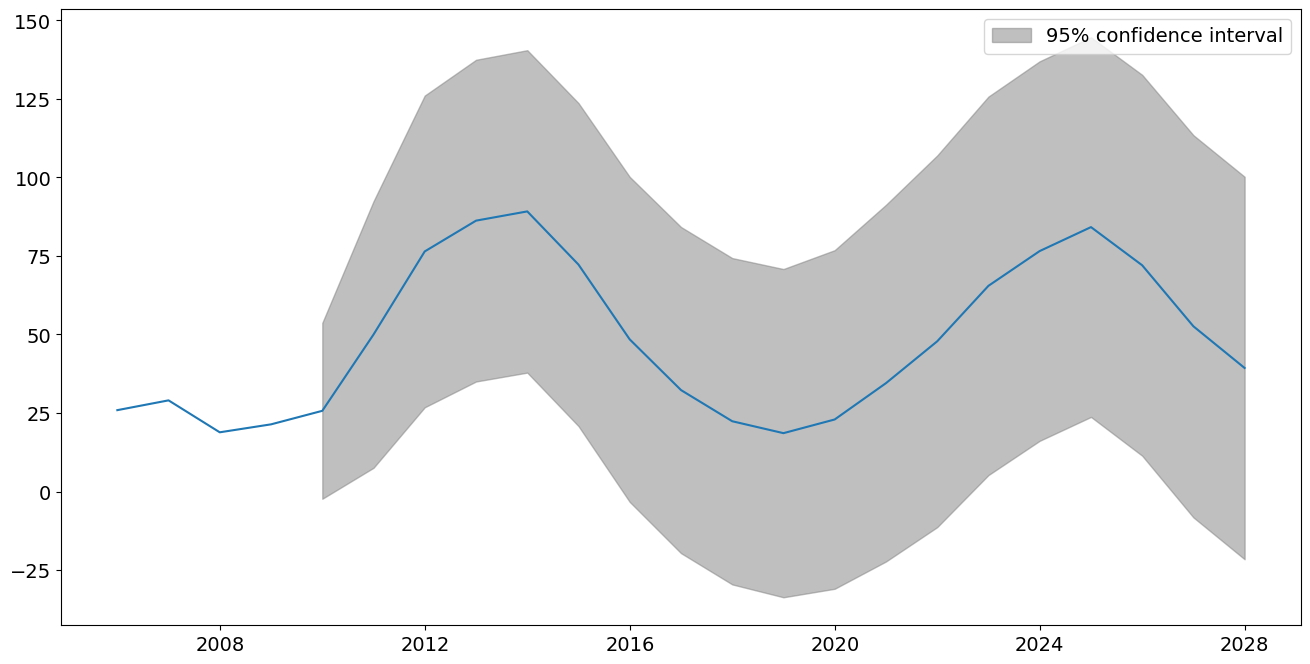

In [77]:
fig = pandas_ar_res.plot_predict(start="2005", end="2027")

## Fim